## Data Mining for Networks

Yana RAGOZINA - Thomas PAUL

SI5 IAID FISA

In [1]:
import numpy as np

## Assignment 1

### Exercise 1

Gradient descent algorithm

In [2]:
def f(x):
    return 2*x**4 - 4*x**3 + 3*x**2 + 4*x - 3

In [3]:
## 1. derivative
def der_f(x):
    return 8*x**3 - 12*x**2 + 6*x + 4

In [4]:
## 2. gradient descent algorithm

alpha = 0.1

def gradient_descent(x):
    x = x - alpha * der_f(x)
    return x

In [5]:
## 3. 2 steps of gradient descent starting from x = 0 and from x = 10

## case 1 : x = 0

x = 0

# step 1:
x = gradient_descent(x)

print("x = 0, step 1 : ", x)

# step 2:
x = gradient_descent(x)

print("x = 0, step 2 : ", x)


## case 2 : x = 10

x = 10

# step 1:
x = gradient_descent(x)

print("x = 10, step 1 : ", x)

# step 2:
x = gradient_descent(x)

print("x = 10, step 2 : ", x)

x = 0, step 1 :  -0.4
x = 0, step 2 :  -0.31679999999999997
x = 10, step 1 :  -676.4000000000001
x = 10, step 2 :  248120326.78720012


We can observe the influence of the initial parameter initialization for the graident descent algorithm.

The descent is slower with theta = 0 and it explodes by the end of the 2nd step for theta = 10.

Therefore, we would prefer initializing theta = 0 instead of theta = 10 if we want to achieve the global minimum. Slower, this initialization has less risk for the descent to fluctuate or even diverge without ever reaching a minimum.

### Exercise 2

Linear regression and gradient descent

#### Example 1 - linear samples

To modelize a linear regression function we first start by giving a small dataset of scattered points.

We choose a set of points that are linearly and proportionally distributed in the 2-D space according to the y = x equation. Therefore, the model we seek to obtain should be as close as possible to a linear function y = x.

We also choose to set the learning rate (alpha) to 0.001 as far as it gave the best experimental results after numerous tests. In fact, choosing alpha bigger implies a higher risk of diverging gradient descent. With alpha = 0.1 we obtained diverging gradient descent over 50 epochs with the theta parameters reaching exponential values. With the chosen theta value, the gradient descent converges sufficiently well.

In [6]:
alpha = 0.001

X = np.array([1, 2, 3, 4, 8, 15, 30, 37, 55, 71, 99])
y_true = np.array([1, 2, 3, 4, 8, 15, 30, 37, 55, 71, 99])

#random initial parameter initialization
t0 = 1
t1 = 5

nb_epochs = 50

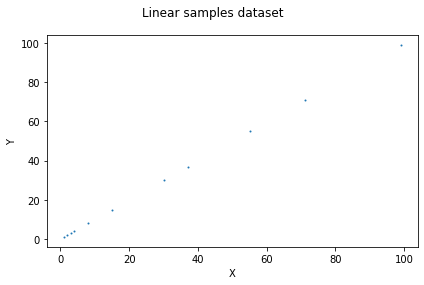

In [7]:
from matplotlib import pyplot as plt
# plot the initial distribution
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
plt.tight_layout()
plt.show()

Below are the definitions for the linear regression function.

In [8]:
# linear function initialization
def h_theta(theta0, theta1, j):
    return theta0 + theta1 * j

##### 1. simultaneous updates

We first define the linear regression function using simultaneous updates for the gradient descent.

In this section we implement and test three types of the simultaneous update gradient descent on the previously defined dataset : mini-batch (using several random samples from the dataset), batch (using the whole dataset) and stochastic (training on one random sample for each epoch).

In [9]:
#linear regression function for the simultaneous update gradient descent
def linear_regression_sim(theta0, theta1, x, y):

    #predicted values for the current theta parameters
    y_pred = []

    #calculate the estimated values
    for i in range(len(x)):
        y_pred.append(h_theta(theta0, theta1, x[i]))

    #simultaneous parameter update
    theta0 = theta0 - alpha * (np.sum(np.array(y_pred) - y) / len(x))
    theta1 = theta1 - alpha * (np.sum((np.array(y_pred) - y) * x) / len(x))

    return theta0, theta1


1. a. mini-batch gradient descent

In [10]:
# mini-batch gradient descent

#create a random batch 
batch_size = 5 #size chosen semi-randomly, based on the whole dataset size proportions
random_indices = np.random.choice(len(X), batch_size) # retrieve random samples
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    #display the updated parameter values
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.879  theta1 =  -3.113200000000001
epoch  1  theta0 =  1.001517  theta1 =  5.172384560000003
epoch  2  theta0 =  0.8753439461999999  theta1 =  -3.2892156688480014
epoch  3  theta0 =  1.0031450723192399  theta1 =  5.35217103637404
epoch  4  theta0 =  0.8715767961556995  theta1 =  -3.472790546100196
epoch  5  theta0 =  1.0048889357425497  theta1 =  5.53967728557441
epoch  6  theta0 =  0.8676937282395749  theta1 =  -3.664249241186633
epoch  7  theta0 =  1.0067535117469344  theta1 =  5.7352348135561275
epoch  8  theta0 =  0.8636897138285037  theta1 =  -3.8639303030305037
epoch  9  theta0 =  1.0087439332055903  theta1 =  5.939189361918682
epoch  10  theta0 =  0.8595595084148242  theta1 =  -4.072186818642761
epoch  11  theta0 =  1.0108655534656923  theta1 =  6.151901519218088
epoch  12  theta0 =  0.855297642335684  theta1 =  -4.289387037421795
epoch  13  theta0 =  1.0131239558160021  theta1 =  6.373747358530098
epoch  14  theta0 =  0.8508984111042832  theta1 =  -4.515915

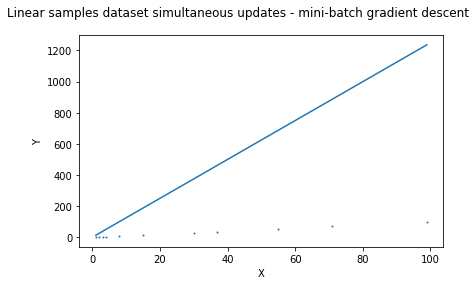

In [11]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset simultaneous updates - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

We observe a correct parameter convergence and sufficiently correct theta values : the linear regression coefficients follow the linear data distribution and are close to 1.

1. b. batch gradient descent

In [12]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.8808181818181818  theta1 =  -2.4677272727272728
epoch  1  theta0 =  0.9823929421487604  theta1 =  3.9546450413223138
epoch  2  theta0 =  0.8941142184402705  theta1 =  -1.5686769610818931
epoch  3  theta0 =  0.9691128326174316  theta1 =  3.1814775950942007
epoch  4  theta0 =  0.903690972657031  theta1 =  -0.9037120302014854
epoch  5  theta0 =  0.959033318940327  theta1 =  2.6096270617674104
epoch  6  theta0 =  0.910517122432804  theta1 =  -0.4118826997878613
epoch  7  theta0 =  0.9513213214404671  theta1 =  2.1866757147003244
epoch  8  theta0 =  0.9153091267301534  theta1 =  -0.048108937450883626
epoch  9  theta0 =  0.945360672573563  theta1 =  1.8738540488555278
epoch  10  theta0 =  0.9185968968211671  theta1 =  0.2209516135895071
epoch  11  theta0 =  0.9406956386137468  theta1 =  1.6424871365494846
epoch  12  theta0 =  0.9207723684861711  theta1 =  0.4199598219431955
epoch  13  theta0 =  0.9369891468329996  theta1 =  1.4713662603426438
epoch  14  theta0 =  0.9221

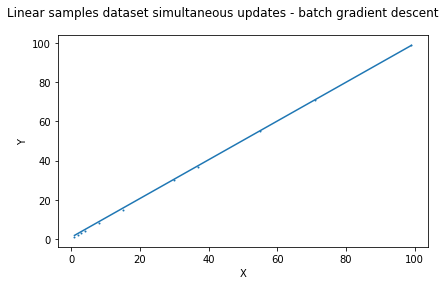

In [13]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset simultaneous updates - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

We observe a correct parameter convergence and sufficiently correct theta values : the linear regression coefficients follow the linear data distribution and are close to 1. The results are slightly better than the mini-batch gradient descent

1. c. stochastic gradient descent

In [14]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #for each epoch, retrieve and train on one random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.715  theta1 =  -15.235
epoch  1  theta0 =  0.9578099999999999  theta1 =  -11.59285
epoch  2  theta0 =  1.6494589400000002  theta1 =  26.447841700000005
epoch  3  theta0 =  -0.15898727964000003  theta1 =  -101.95183989444001
epoch  4  theta0 =  0.6647864267951601  theta1 =  -95.36165024295873
epoch  5  theta0 =  0.7604832906113237  theta1 =  -95.26595337914257
epoch  6  theta0 =  7.594605497239835  theta1 =  389.95672329148175
epoch  7  theta0 =  -20.028916461952612  theta1 =  -1571.313335811182
epoch  8  theta0 =  38.16670587952308  theta1 =  581.9246908234184
epoch  9  theta0 =  6.177681178355542  theta1 =  -1177.471667740796
epoch  10  theta0 =  15.599276839103554  theta1 =  -1102.0989024548119
epoch  11  theta0 =  16.686776464719262  theta1 =  -1101.0114028291962
epoch  12  theta0 =  25.486180910888113  theta1 =  -1030.6161672598455
epoch  13  theta0 =  98.70544260542626  theta1 =  4167.951413052363
epoch  14  theta0 =  -197.24681316389695  theta1 =  -16844.658

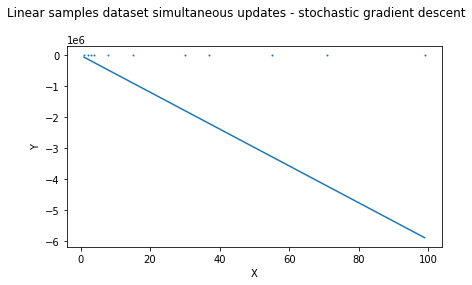

In [15]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset simultaneous updates - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

The results are less satisfying : the model does not converge to expected values (1 and 1)

The best results were observed for the batch gradient descent

2. non-simultaneous updates

We now define the linear regression function using non-simultaneous updates for the gradient descent. Therefore, we update the parameters one by one, first theta 0 and only next theta 1, taking the theta 0 update into account.

In this section we implement and test the same three types of the non-simultaneous update gradient descent on the previously defined dataset : mini-batch (using several random samples from the dataset), batch (using the whole dataset) and stochastic (training on one random sample for each epoch).

Below are the definitions for the linear regression function

In [16]:
def h(x, theta0, theta1):
    #calculate the estimated values
    y_pred = []
    for i in range(len(x)):
        y_pred.append(h_theta(theta0, theta1, x[i]))

    return y_pred

In [17]:
#linear regression function for non-simultaneous update gradient descent
def linear_regression_nsim(param, theta0, theta1, x, y):

    #retrieve the predicted values for current parameter values
    y_pred = h(x, theta0, theta1)

    #non-simultaneous parameter update
    if param == 0: # case where we first update only the first theta parameter
        theta0 = theta0 - alpha * (np.sum(np.array(y_pred) - y) / len(x))
    else: # case where we next update only the second theta parameter
        theta1 = theta1 - alpha * (np.sum((np.array(y_pred) - y) * x) / len(x))

    return theta0, theta1

2. a. mini-batch gradient descent

In [18]:
# mini-batch gradient descent

#create a random batch
batch_size = 5 #size chosen semi-randomly, based on the whole dataset size proportions
random_indices = np.random.choice(len(X), batch_size) # retrieve random samples
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    #non-simultaneous parameter update
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch) # update theta 0
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch) # update theta 1 knowing the updated theta 0
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  842.265092695146  theta1 =  61487.43251219729
epoch  1  theta0 =  -806.4135637244362  theta1 =  -63554.35933410418
epoch  2  theta0 =  897.67647999328  theta1 =  65693.18382179987
epoch  3  theta0 =  -863.7717229109494  theta1 =  -67901.56898956702
epoch  4  theta0 =  956.8808977323579  theta1 =  70186.6119271531
epoch  5  theta0 =  -925.0503828130779  theta1 =  -72546.1313824169
epoch  6  theta0 =  1020.1377886185082  theta1 =  74987.39415668411
epoch  7  theta0 =  -990.5177125692442  theta1 =  -77508.38568331453
epoch  8  theta0 =  1087.7243414561538  theta1 =  80116.55378419624
epoch  9  theta0 =  -1060.4602243017614  theta1 =  -82810.06227884762
epoch  10  theta0 =  1159.936704995656  theta1 =  85596.55209263458
epoch  11  theta0 =  -1135.1840277919462  theta1 =  -88474.37793183932
epoch  12  theta0 =  1237.0912848091386  theta1 =  91451.38673508895
epoch  13  theta0 =  -1215.0161709760544  theta1 =  -94526.13745069981
epoch  14  theta0 =  1319.5261288736767  th

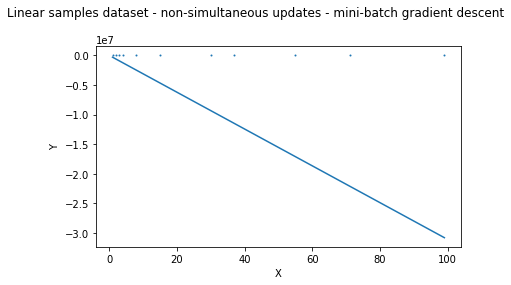

In [19]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset - non-simultaneous updates - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

We can clearly observe  worse performance using non-simultaneous update comparing to the simultaneous update. The gradient descent does not converge to the exprected values, even if the global trend seems correct

2. b. batch gradient descent

In [20]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    #non-simultaneous parameter update
    t0, t1 = linear_regression_nsim(0, t0, t1, X, y_true)
    t0, t1 = linear_regression_nsim(1, t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.8808181818181818  theta1 =  -2.464205991735537
epoch  1  theta0 =  0.9822889043012772  theta1 =  3.9486203416328722
epoch  2  theta0 =  0.8941882871214593  theta1 =  -1.5608924112230254
epoch  3  theta0 =  0.9689568291659272  theta1 =  3.1725751616940707
epoch  4  theta0 =  0.9037981516503455  theta1 =  -0.8941302321003457
epoch  5  theta0 =  0.9588572921743872  theta1 =  2.5997611567774626
epoch  6  theta0 =  0.9106327643410606  theta1 =  -0.40197248961288734
epoch  7  theta0 =  0.9511440460425548  theta1 =  2.1769570976660018
epoch  8  theta0 =  0.9154191695654712  theta1 =  -0.03869459895825722
epoch  9  theta0 =  0.9451924544560361  theta1 =  1.8648790804956465
epoch  10  theta0 =  0.9186940164414814  theta1 =  0.2294538853245618
epoch  11  theta0 =  0.9405414576313597  theta1 =  1.634530685502371
epoch  12  theta0 =  0.9208534186475219  theta1 =  0.427385000683149
epoch  13  theta0 =  0.9368507356632358  theta1 =  1.4645089390409343
epoch  14  theta0 =  0.922

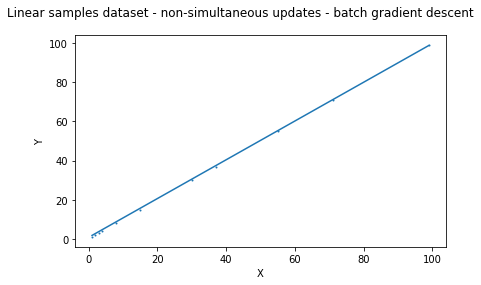

In [21]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset - non-simultaneous updates - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

The results remain unsufficient comparing to the simultaneous update.

2. c. stochastic gradient descent

In [22]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    #non-simultaneous parameter update
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.779  theta1 =  -7.1428449999999994
epoch  1  theta0 =  1.584362655  theta1 =  72.508326942155
epoch  2  theta0 =  0.5101533882126752  theta1 =  56.41130107934693
epoch  3  theta0 =  -3.424559141809169  theta1 =  -222.67392396257247
epoch  4  theta0 =  -2.7501128107796426  theta1 =  -220.65260830847697
epoch  5  theta0 =  3.902215551285446  theta1 =  -21.282327297386274
epoch  6  theta0 =  3.920595663031547  theta1 =  -21.26396556575192
epoch  7  theta0 =  4.094786791894531  theta1 =  -19.871830063878953
epoch  8  theta0 =  4.132435665230394  theta1 =  -19.7966076149539
epoch  9  theta0 =  5.2721166483876285  theta1 =  42.82316400462032
epoch  10  theta0 =  5.2250213677346204  theta1 =  42.77611581924796
epoch  11  theta0 =  3.674080061054711  theta1 =  -14.551327699561526
epoch  12  theta0 =  4.136945811980502  theta1 =  -0.6792411443155668
epoch  13  theta0 =  4.137846589601469  theta1 =  -0.6765415137855311
epoch  14  theta0 =  4.184004988425433  theta1 =  0.706

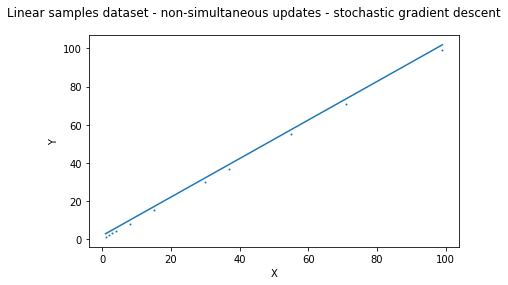

In [23]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Linear samples dataset - non-simultaneous updates - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

We observe a similar pattern with the two other non-simultaneous update methods.

For the given dataset we can conclude that the simultaneous parameter update for the gradient descent remains the most accurate solution : we have observed correct results for the batch and mini-batch methods of this update type.

#### Example 2 - few linear samples 

In this section we seek to test all the previous linear regression types on another type of dataset, having much fewer but simpler samples. We seek to observe the defined model's performance on another type of dataset, having less values to be train on.

In [24]:
X = np.array([1, 2, 3, 4]) #a simple, small dataset, following a linear trend
y_true = np.array([1, 2, 3, 4])

#random initial parameter initialization
t0 = 1
t1 = 5

nb_epochs = 50

In the next sections we will repeat the previous tests on the new data

1. simultaneous updates

1. a. mini-batch gradient descent

In [25]:
# mini-batch gradient descent

#create a random batch
batch_size = 2 # based on the current dataset reduced size
random_indices = np.random.choice(len(X), batch_size)
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.989  theta1 =  4.9715
epoch  1  theta0 =  0.97808225  theta1 =  4.94321275
epoch  2  theta0 =  0.9672461358750001  theta1 =  4.9151366615
epoch  3  theta0 =  0.9564910480853751  theta1 =  4.887270157860563
epoch  4  theta0 =  0.9458163816426384  theta1 =  4.859611674214256
epoch  5  theta0 =  0.9352215360754601  theta1 =  4.8321596573777565
epoch  6  theta0 =  0.9247059153959403  theta1 =  4.804912565764613
epoch  7  theta0 =  0.9142689280661328  theta1 =  4.777868869298653
epoch  8  theta0 =  0.9039099869648201  theta1 =  4.751027049328047
epoch  9  theta0 =  0.8936285093545351  theta1 =  4.724385598540003
epoch  10  theta0 =  0.8834239168488306  theta1 =  4.697943020876107
epoch  11  theta0 =  0.8732956353797915  theta1 =  4.67169783144829
epoch  12  theta0 =  0.863243095165791  theta1 =  4.645648556455426
epoch  13  theta0 =  0.8532657306794866  theta1 =  4.619793733100551
epoch  14  theta0 =  0.8433629806160557  theta1 =  4.594131909508699
epoch  15  theta0 = 

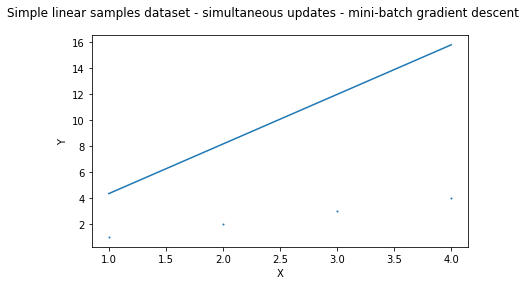

In [26]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - simultaneous updates - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

1. b. batch gradient descent

In [27]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.989  theta1 =  4.9675
epoch  1  theta0 =  0.97809225  theta1 =  4.93527125
epoch  2  theta0 =  0.967275979625  theta1 =  4.903311485000001
epoch  3  theta0 =  0.956550424932875  theta1 =  4.871618458913438
epoch  4  theta0 =  0.9459148283606585  theta1 =  4.840189944409254
epoch  5  theta0 =  0.9353684386712747  theta1 =  4.809023732755283
epoch  6  theta0 =  0.9249105109007152  theta1 =  4.77811763366294
epoch  7  theta0 =  0.9145403063056571  theta1 =  4.747469475133216
epoch  8  theta0 =  0.9042570923115184  theta1 =  4.717077103303953
epoch  9  theta0 =  0.894060142460947  theta1 =  4.686938382298394
epoch  10  theta0 =  0.8839487363627401  theta1 =  4.657051194075004
epoch  11  theta0 =  0.8739221596411898  theta1 =  4.627413438278535
epoch  12  theta0 =  0.8639797038858523  theta1 =  4.598023032092343
epoch  13  theta0 =  0.8541206666017356  theta1 =  4.568877910091937
epoch  14  theta0 =  0.844344351159904  theta1 =  4.539976024099743
epoch  15  theta0 =  0

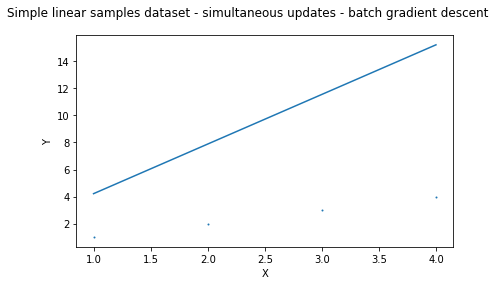

In [28]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - simultaneous updates - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

1. c. stochastic gradient descent

In [29]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.991  theta1 =  4.982
epoch  1  theta0 =  0.986027  theta1 =  4.9770270000000005
epoch  2  theta0 =  0.977086919  theta1 =  4.959146838000001
epoch  3  theta0 =  0.968191538405  theta1 =  4.941356076810001
epoch  4  theta0 =  0.955399278636165  theta1 =  4.902979297503496
epoch  5  theta0 =  0.9388319621675149  theta1 =  4.836710031628895
epoch  6  theta0 =  0.9340564201737185  theta1 =  4.831934489635099
epoch  7  theta0 =  0.9292904292639097  theta1 =  4.82716849872529
epoch  8  theta0 =  0.9168796333384699  theta1 =  4.789936110948971
epoch  9  theta0 =  0.9008030092613355  theta1 =  4.725629614640433
epoch  10  theta0 =  0.8961765766374338  theta1 =  4.721003182016531
epoch  11  theta0 =  0.8803963873327302  theta1 =  4.657882424797717
epoch  12  theta0 =  0.8685423436710042  theta1 =  4.622320293812539
epoch  13  theta0 =  0.8568068404458956  theta1 =  4.587113784137213
epoch  14  theta0 =  0.845188692253038  theta1 =  4.552259339558641
epoch  15  theta0 =  0.

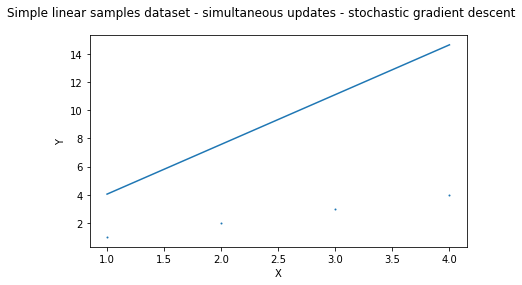

In [30]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - simultaneous updates - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

The results seem to be less satisfying for a regression trained on a small dataset. Even if the samples still follow a linear distribution, the gradient descent converges to less aacurate values comparing to the same convergence performed on a larger dataset. 

2. non-simultaneous parameter updates

2. a. mini-batch gradient descent

In [31]:
# mini-batch gradient descent

#create a random batch
batch_size = 2
random_indices = np.random.choice(len(X), batch_size)
X_batch = X[random_indices]
y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.5177577204374492  theta1 =  3.50859106308195
epoch  1  theta0 =  0.5109684850593068  theta1 =  3.491007799959269
epoch  2  theta0 =  0.5042299970743493  theta1 =  3.473555674266848
epoch  3  theta0 =  0.49754187789160786  theta1 =  3.4562337076893845
epoch  4  theta0 =  0.4909037517444928  theta1 =  3.439040929210042
epoch  5  theta0 =  0.4843152456697232  theta1 =  3.4219763750560026
epoch  6  theta0 =  0.4777759894864135  theta1 =  3.4050390886444224
epoch  7  theta0 =  0.471285615775316  theta1 =  3.388228120528795
epoch  8  theta0 =  0.46484375985821874  theta1 =  3.3715425283457123
epoch  9  theta0 =  0.45845005977749625  theta1 =  3.3549813767620216
epoch  10  theta0 =  0.4521041562758137  theta1 =  3.3385437374223788
epoch  11  theta0 =  0.4458056927759819  theta1 =  3.3222286888971935
epoch  12  theta0 =  0.43955431536096295  theta1 =  3.3060353166309593
epoch  13  theta0 =  0.4333496727540246  theta1 =  3.289962712890973
epoch  14  theta0 =  0.42719141629

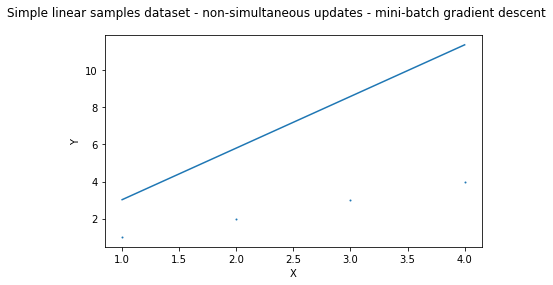

In [32]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - non-simultaneous updates - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

2. a. batch gradient descent

In [33]:
# batch gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_nsim(0, t0, t1, X, y_true)
    t0, t1 = linear_regression_nsim(1, t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.989  theta1 =  4.9675275
epoch  1  theta0 =  0.97809218125  theta1 =  4.935325813296875
epoch  2  theta0 =  0.9672757745355078  theta1 =  4.90339268026081
epoch  3  theta0 =  0.9565500170603203  theta1 =  4.871725860116203
epoch  4  theta0 =  0.9459141523929695  theta1 =  4.840323130784349
epoch  5  theta0 =  0.9353674304136157  theta1 =  4.809182288727433
epoch  6  theta0 =  0.9249091072613835  theta1 =  4.778301148793823
epoch  7  theta0 =  0.9145384452821376  theta1 =  4.747677544064665
epoch  8  theta0 =  0.9042547129766938  theta1 =  4.717309325701738
epoch  9  theta0 =  0.8940571849494627  theta1 =  4.6871943627966015
epoch  10  theta0 =  0.8839451418575218  theta1 =  4.657330542220984
epoch  11  theta0 =  0.8739178703601118  theta1 =  4.627715768478426
epoch  12  theta0 =  0.8639746630685556  theta1 =  4.598347963557166
epoch  13  theta0 =  0.8541148184965942  theta1 =  4.569225066784246
epoch  14  theta0 =  0.844337641011137  theta1 =  4.540345034680836
ep

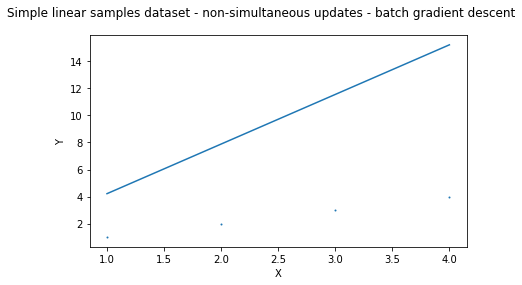

In [34]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - non-simultaneous updates - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

2. c. stochastic gradient descent

In [35]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 1
t1 = 5

# calculate gradient descent
for i in range(nb_epochs):

    #get a random sample
    batch_size = 1
    random_indices = np.random.choice(len(X), batch_size)

    X_batch = X[random_indices]
    y_batch = y_true[random_indices]
    
    t0, t1 = linear_regression_nsim(0, t0, t1, X_batch, y_batch)
    t0, t1 = linear_regression_nsim(1, t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  0.991  theta1 =  4.982018
epoch  1  theta0 =  0.9860269819999999  theta1 =  4.977049955018
epoch  2  theta0 =  0.9770868551079639  theta1 =  4.959187581487712
epoch  3  theta0 =  0.9721505806713682  theta1 =  4.9542562433255535
epoch  4  theta0 =  0.9672241738473712  theta1 =  4.94933476290838
epoch  5  theta0 =  0.9544089453847987  theta1 =  4.910927523206051
epoch  6  theta0 =  0.9495436089162078  theta1 =  4.9060670520739285
epoch  7  theta0 =  0.9368758641510698  theta1 =  4.86810182101281
epoch  8  theta0 =  0.9204665810028675  theta1 =  4.802530325552594
epoch  9  theta0 =  0.9081385234452068  theta1 =  4.7655831370522845
epoch  10  theta0 =  0.8996992186476571  theta1 =  4.74872140606678
epoch  11  theta0 =  0.8913020766168759  theta1 =  4.731943916289279
epoch  12  theta0 =  0.8829468867076804  theta1 =  4.715250246850707
epoch  13  theta0 =  0.8672029388335699  theta1 =  4.652337431145762
epoch  14  theta0 =  0.8517263861701533  theta1 =  4.590493126702749


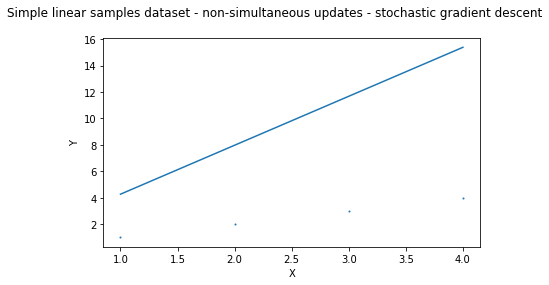

In [36]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Simple linear samples dataset - non-simultaneous updates - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('X')
axs.set_ylabel('Y')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

We observe highly similary results comparing to the simultaneous update. 

We can conclude that the dataset size has a relatively high importance for the linear regression and the gradient descent, and this is even more the case for the simultaneous update methods, whose accuracy was more improved on a larger dataset.

#### Example 3 - complex sample distribution, different parameter initialization

In this part we will compare the linear regression with the simultaneous update gradient descent (as far as it gave the most sufficient results) convergence on a more complex data distribution.

For this, we will take a real-world toy dataset of diabetes from scikit-learn and we will test the linear regression with the three simultaneous update gradient descents on this new dataset.

Finally, we will compare the results with the pre-defined linear regression function from scikit-learn library.

In [37]:
from sklearn import datasets
from matplotlib import pyplot as plt

# Load a toy dataset
diabetes = datasets.load_diabetes(as_frame=True)

In [38]:
#extract the data
X = diabetes['data']['bmi']
y_true = diabetes['target']

X.shape, y_true.shape

((442,), (442,))

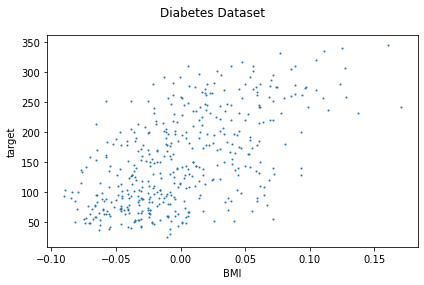

In [39]:
# plot the initial distribution
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
plt.tight_layout()
plt.show()

We have tested several values of the learning rate. We have observed the most optimal convergence for alpha = 1.

All the tested values before 1 showed a very slow convergence.  The values above 1 showed very innacurate results with a tendency to diverge.

In [40]:
alpha = 1

#random initial parameter initialization
t0 = 12
t1 = 3

nb_epochs = 500

In [41]:
def linear_regression_sim(theta0, theta1, x, y):

    y_pred = []

    #calculate the estimated values
    for i in range(len(x)):
        y_pred.append(h_theta(theta0, theta1, x[i]))

    #simultaneous parameter update
    theta0 = theta0 - alpha * (np.sum(np.array(y_pred) - y) / len(x))
    theta1 = theta1 - alpha * (np.sum((np.array(y_pred) - y) * x) / len(x))

    return theta0, theta1

In [42]:
# mini-batch gradient descent

#create a random batch
batch_size = 50 #randomly chosen based on the dataset size
random_indices = np.random.choice(len(X), batch_size)
X_batch = []
for i in range(len(random_indices)):
    X_batch.append(X[random_indices[i]])

y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  145.96167465660602  theta1 =  4.442278274224971
epoch  1  theta0 =  145.96247976355258  theta1 =  5.956540718528339
epoch  2  theta0 =  145.9633250534211  theta1 =  7.467868311143792
epoch  3  theta0 =  145.96416870500005  theta1 =  8.9762667635249
epoch  4  theta0 =  145.96501072147763  theta1 =  10.481741752708556
epoch  5  theta0 =  145.9658511060229  theta1 =  11.984298944728861
epoch  6  theta0 =  145.96668986179876  theta1 =  13.483943994638437
epoch  7  theta0 =  145.96752699196193  theta1 =  14.980682546529716
epoch  8  theta0 =  145.96836249966307  theta1 =  16.474520233556174
epoch  9  theta0 =  145.9691963880467  theta1 =  17.965462677953543
epoch  10  theta0 =  145.97002866025127  theta1 =  19.45351549106096
epoch  11  theta0 =  145.97085931940913  theta1 =  20.938684273342094
epoch  12  theta0 =  145.97168836864654  theta1 =  22.420974614406223
epoch  13  theta0 =  145.97251581108378  theta1 =  23.900392093029264
epoch  14  theta0 =  145.973341649835  t

 176  theta0 =  146.08803272367754  theta1 =  230.4377074129068
epoch  177  theta0 =  146.08863467633148  theta1 =  231.51396267545192
epoch  178  theta0 =  146.08923546232654  theta1 =  232.58813202187446
epoch  179  theta0 =  146.08983508392387  theta1 =  233.66021949493845
epoch  180  theta0 =  146.0904335433802  theta1 =  234.73022912957254
epoch  181  theta0 =  146.0910308429479  theta1 =  235.7981649528852
epoch  182  theta0 =  146.091626984875  theta1 =  236.86403098417986
epoch  183  theta0 =  146.09222197140517  theta1 =  237.92783123497006
epoch  184  theta0 =  146.09281580477764  theta1 =  238.9895697089945
epoch  185  theta0 =  146.09340848722744  theta1 =  240.04925040223216
epoch  186  theta0 =  146.09400002098516  theta1 =  241.1068773029173
epoch  187  theta0 =  146.09459040827716  theta1 =  242.1624543915545
epoch  188  theta0 =  146.09517965132537  theta1 =  243.2159856409336
epoch  189  theta0 =  146.0957677523475  theta1 =  244.26747501614474
epoch  190  theta0 =  1

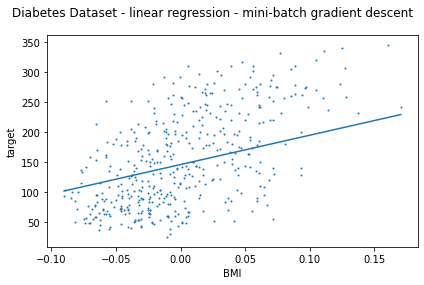

In [43]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset - linear regression - mini-batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

In [44]:
# batch gradient descent

#reinitialize the parameters
t0 = 12
t1 = 3

# calculate gradient descent
for i in range(nb_epochs):
    t0, t1 = linear_regression_sim(t0, t1, X, y_true)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  152.13348416289594  theta1 =  5.141256245212846
epoch  1  theta0 =  152.13348416289594  theta1 =  7.277668019282787
epoch  2  theta0 =  152.13348416289594  theta1 =  9.409246282551663
epoch  3  theta0 =  152.13348416289594  theta1 =  11.536001970564275
epoch  4  theta0 =  152.13348416289594  theta1 =  13.657945994124368
epoch  5  theta0 =  152.13348416289594  theta1 =  15.775089239350615
epoch  6  theta0 =  152.13348416289594  theta1 =  17.887442567732457
epoch  7  theta0 =  152.13348416289594  theta1 =  19.99501681618583
epoch  8  theta0 =  152.13348416289594  theta1 =  22.09782279710877
epoch  9  theta0 =  152.13348416289594  theta1 =  24.195871298436856
epoch  10  theta0 =  152.13348416289594  theta1 =  26.28917308369859
epoch  11  theta0 =  152.13348416289594  theta1 =  28.37773889207059
epoch  12  theta0 =  152.13348416289594  theta1 =  30.461579438432697
epoch  13  theta0 =  152.13348416289594  theta1 =  32.54070541342294
epoch  14  theta0 =  152.1334841628959

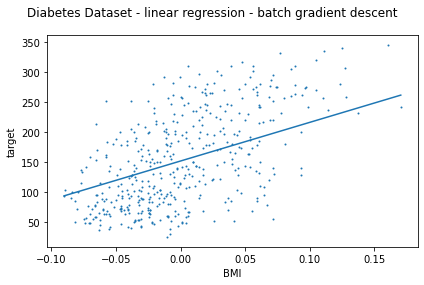

In [45]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset - linear regression - batch gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

In [46]:
# stochastic gradient descent

#reinitialize the parameters
t0 = 12
t1 = 3

#get a random sample
batch_size = 1
random_indices = np.random.choice(len(X), batch_size)
X_batch = []
for i in range(len(random_indices)):
    X_batch.append(X[random_indices[i]])

y_batch = y_true[random_indices]

# calculate gradient descent
for i in range(nb_epochs):
    
    t0, t1 = linear_regression_sim(t0, t1, X_batch, y_batch)
    print("epoch ", i, " theta0 = ", t0, " theta1 = ", t1)

epoch  0  theta0 =  83.89574728598501  theta1 =  5.498442260233455
epoch  1  theta0 =  83.80892415717197  theta1 =  5.495425077960777
epoch  2  theta0 =  83.8090290069855  theta1 =  5.495428721586652
epoch  3  theta0 =  83.80902888036621  theta1 =  5.495428717186518
epoch  4  theta0 =  83.80902888051912  theta1 =  5.495428717191832
epoch  5  theta0 =  83.80902888051894  theta1 =  5.4954287171918255
epoch  6  theta0 =  83.80902888051894  theta1 =  5.4954287171918255
epoch  7  theta0 =  83.80902888051894  theta1 =  5.4954287171918255
epoch  8  theta0 =  83.80902888051894  theta1 =  5.4954287171918255
epoch  9  theta0 =  83.80902888051894  theta1 =  5.4954287171918255
epoch  10  theta0 =  83.80902888051894  theta1 =  5.4954287171918255
epoch  11  theta0 =  83.80902888051894  theta1 =  5.4954287171918255
epoch  12  theta0 =  83.80902888051894  theta1 =  5.4954287171918255
epoch  13  theta0 =  83.80902888051894  theta1 =  5.4954287171918255
epoch  14  theta0 =  83.80902888051894  theta1 =  

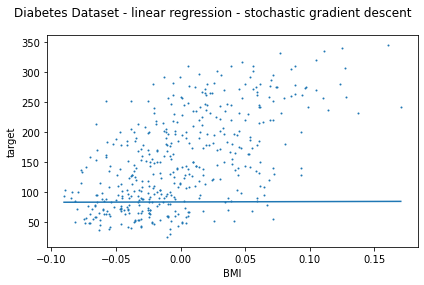

In [47]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset - linear regression - stochastic gradient descent')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, t0 + t1 * n)
plt.tight_layout()
plt.show()

The results seem visually correct for the first two methods: mini-batch and batch. The stochastic gradient descent, on the other hand, seems to have a very slow convergence.

We will compare now the obtained results with the linear regression function of the scikit-learn library.

In [48]:
from sklearn.linear_model import LinearRegression
#apply the linear regression on our data
reg = LinearRegression().fit(np.array(X).reshape(-1,1), np.array(y_true).reshape(-1,1))
# retrieve the coefficients
intercept = reg.intercept_[0]
coefficients = reg.coef_[0]

# display the equation
equation = f'h(theta) = {intercept:.2f} + {coefficients[0]:.2f} * x'
print(equation)

h(theta) = 152.13 + 949.44 * x


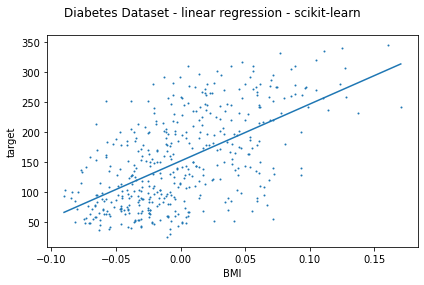

In [49]:
# plot the distribution + the resulting parameters
fig, axs = plt.subplots(1, 1)
fig.suptitle('Diabetes Dataset - linear regression - scikit-learn')
axs.scatter(X, y_true, s=1)
axs.set_xlabel('BMI')
axs.set_ylabel('target')
n = np.linspace(min(X), max(X), 10)
axs.plot(n, intercept + coefficients * n)
plt.tight_layout()
plt.show()

In conclusion, the batch and mini-batch gradient descent methods seem overall correct applied on complex data comparing to the results of the scikit-learn's linear regression model.  For instance, the theta0 parameter values are nearly perfectly correct.

However, there still remains some inaccuracy even if the global trend remains correct. (theta1 =  759.3 in our model against theta1 = 949.4 in the imported model). This observation stays valid for the simultaneous update gradient descent, which we showed to be the most performant solution.

We have also observed the importance of adapting the learning rate value to the size of the dataset. Different datasets may require a very different learning rate value to obtain a correct linear regression.

## Assignment 2

### Exercise 3

In [50]:
# 1. Install networkX for manipulating graphs in Python
import networkx as nx
import matplotlib.pyplot as plt

In [51]:
# 2. Write a function to compute the graph edit distance between two graphs

def graph_edit_distance(G1, G2):
    total_cost = 0
    cost = 1

    # 1 - Node addition
    nodes_only_in_G2 = set(G2.nodes) - set(G1.nodes)
    total_cost += len(nodes_only_in_G2) * cost

    # 2 - Edge addition
    edges_only_in_G2 = set(G2.edges) - set(G1.edges)
    total_cost += len(edges_only_in_G2) * cost
    
    # 3 - Node removal
    nodes_only_in_G1 = set(G1.nodes) - set(G2.nodes)
    total_cost += len(nodes_only_in_G1) * cost

    # 4 - Edge removal
    edges_only_in_G1 = set(G1.edges) - set(G2.edges)
    total_cost += len(edges_only_in_G1) * cost

    return min(total_cost)

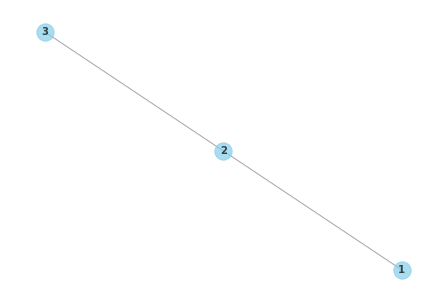

In [52]:
# 3. Provide examples to test the function.
# Creating graph 1
G1 = nx.Graph()
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)

G1.add_edges_from([(1, 2), (2, 3)])

pos = nx.spring_layout(G1)  # You can use other layout algorithms as well
nx.draw(G1, pos, with_labels=True, font_weight='bold', node_color='skyblue', font_color='black', font_size=10, edge_color='gray', linewidths=1, alpha=0.7)

plt.show()

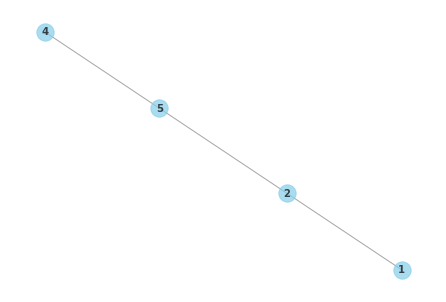

In [53]:
# Creating graph 2
G2 = nx.Graph()
G2.add_node(1)
G2.add_node(2)
G2.add_node(5)
G2.add_node(4)

G2.add_edges_from([(1, 2), (2, 5), (5, 4)])

pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels=True, font_weight='bold', node_color='skyblue', font_color='black', font_size=10, edge_color='gray', linewidths=1, alpha=0.7)
plt.show()

In [80]:
# Alternative, non-functional extended version of the algorithm

# defining operation costs
def node_substitution_cost(u, v):
    return 0 # we consider that substituion operations have 0 cost

def edge_substitution_cost(e1, e2):
    return 0

def node_deletion_cost(u):
    return 1 

def edge_deletion_cost(e):
    return 1 

def node_insertion_cost(v):
    return 1 

def edge_insertion_cost(e):
    return 1  

# graph edit distance algorithm
def graph_edit_distance_extended(g1, g2):
    # create a supergraph from the initial two graphs
    supergraph = nx.DiGraph()
    # add the first node
    supergraph.add_node((0, 0), cost=0, paths=[[]])

    # create a node for the first graph
    for node1 in g1.nodes():
        supergraph.add_node((node1, 0), cost=g1.nodes[node1].get('cost', 0), paths=[[]])

    # create a node for the second graph
    for node2 in g2.nodes():
        supergraph.add_node((0, node2), cost=g2.nodes[node2].get('cost', 0), paths=[[]])

    # add the edges corresponding to operation costs going from graph 1 to graph 2
    for u, v in g1.edges:
        supergraph.add_edge(str(u) + "_del", str(v) + "_del", cost=edge_deletion_cost((u, v)))
        supergraph.add_edge(str(u) + "_del", str(v) + "_ins", cost=edge_insertion_cost((u, v)))
        supergraph.add_edge(str(u) + "_ins", str(v) + "_del", cost=edge_insertion_cost((u, v)))
        supergraph.add_edge(str(u) + "_ins", str(v) + "_ins", cost=edge_substitution_cost((u, v), (u, v)))

    # initialize paths
    for node in supergraph.nodes:
        if node != "super":
            supergraph.nodes[node]['paths'] = [[node]]

    # using Djikstra algorithm to compute the distances
    distance = {node: float('inf') for node in supergraph.nodes}
    distance["super"] = 0

    # while we don't reach the final node
    while "super" in supergraph.nodes:
        #  select the node with the minimum distance value
        current_node = min(supergraph.nodes, key=lambda x: distance[x])
        #  retrieve the cost associated with the current node from the distance dictionary
        current_cost = distance[current_node]

        #  remove the current node from the supergraph if it is not the super node and if the cost is not minimal
        if current_node != (0, 0) and current_cost < supergraph.nodes[current_node]['cost']:
            supergraph.remove_node(current_node)
            continue

        #  iterate over the neighbors
        # retrieve the edge data and calculate the new cumulated cost 
        for neighbor in list(supergraph[current_node]):
            edge_data = supergraph[current_node][neighbor]
            new_cost = current_cost + edge_data['cost']

           # compare the new cost with the existing distance 
            if new_cost < distance[neighbor]:
                # update the distance and extend the paths to the neighbor
                distance[neighbor] = new_cost
                supergraph.nodes[neighbor]['paths'] = [path + [neighbor] for path in supergraph.nodes[current_node]['paths']]
            elif new_cost == distance[neighbor]:
                # append the paths to the neighbor
                supergraph.nodes[neighbor]['paths'].extend([path + [neighbor] for path in supergraph.nodes[current_node]['paths']])

    # retrieve the minimal path length from graph 1 to graph 2
    min_path_length = min(distance[node] for node in supergraph.nodes)
    print("Minimal path length = ",min_path_length)
    return distance, supergraph.nodes


distances, paths = graph_edit_distance_extended(G1, G2)
print("Distances:", distances)
print("Paths:", paths)


Minimal path length =  inf
Distances: {(0, 0): inf, (1, 0): inf, (2, 0): inf, (0, 1): inf, (0, 2): inf, (0, 5): inf, '1_del': inf, '2_del': inf, '2_ins': inf, '1_ins': inf, 'super': 0}
Paths: [(0, 0), (1, 0), (2, 0), (0, 1), (0, 2), (0, 5), '1_del', '2_del', '2_ins', '1_ins']


In [ ]:
graph_edit_distance(G1, G2)

6

In [ ]:
nx.graph_edit_distance(G1, G2)

2.0

The difference between our graph_edit_distance and the one from networkx is that networkx doesn't include the node substitution in the distance.
Our version takes into consideration node substitution as a node and edge addition, then it removes the old node with its edges, so the cost is not minimal.

### Exercise 4

![alternative text](/Users/thomaspaul/Documents/Polytech/S9/DataMining/TD/TD3/exercise4.jpg)


If the image cannot be loaded, please refer to "exercise4.jpg"